                       Logistic Regression HW 1        Ashwin Vadivel

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read CSV file
# train_df = pd.read_csv('titanic_train.csv')

train_df = pd.read_csv('titanic.csv')

In [3]:
train_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [5]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='survived', ylabel='count'>

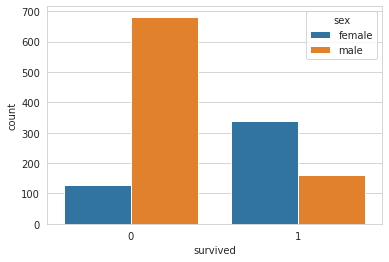

In [6]:
# of those who died, more were likely to be men. Of those who lived women were approx 2x more likely to survive.
sns.countplot(x = 'survived', hue = 'sex', data = train_df)

<AxesSubplot:xlabel='survived', ylabel='count'>

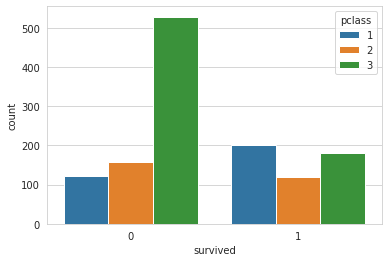

In [7]:
# most that died were of 3rd class
sns.countplot(x = 'survived', hue = 'pclass', data = train_df)

In [8]:
#drop cabin column
train_df.drop(['cabin','name', 'ticket', 'boat', 'body', 'home.dest' ], axis = 1, inplace = True)

In [9]:
# Create dummy variables for categorical data

In [10]:
# need to convert categorical data into numerical where it is easily possible
# Sex and Embarked columns can be mapped to finite values easily
sex = pd.get_dummies(train_df['sex'], drop_first = True)

In [11]:
embark = pd.get_dummies(train_df['embarked'], drop_first=True)

In [12]:
train_df = pd.concat([train_df,sex,embark],axis = 1)

In [13]:
train_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,male,C,Q,S
0,1,1,female,29,0,0,211.3375,S,0,0,0,1
1,1,1,male,0.9167,1,2,151.55,S,1,0,0,1
2,1,0,female,2,1,2,151.55,S,0,0,0,1
3,1,0,male,30,1,2,151.55,S,1,0,0,1
4,1,0,female,25,1,2,151.55,S,0,0,0,1


In [14]:
train_df.drop(['sex','embarked'], axis = 1, inplace = True)

In [15]:
train_df.head()

,pclass,survived,age,sibsp,parch,fare,male,C,Q,S
0,1,1,29,0,0,211.3375,0,0,0,1
1,1,1,0.9167,1,2,151.55,1,0,0,1
2,1,0,2,1,2,151.55,0,0,0,1
3,1,0,30,1,2,151.55,1,0,0,1
4,1,0,25,1,2,151.55,0,0,0,1


In [16]:
## using titanic_train.csv as entire dataset (splitting train, test from here)
train_df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'male', 'C', 'Q',
       'S'],
      dtype='object')

<AxesSubplot:>

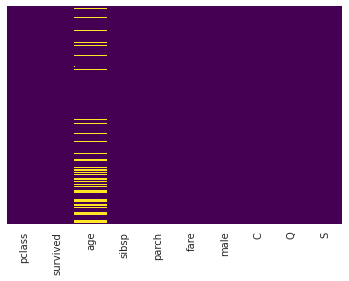

In [17]:
train_df.replace('?', np.NaN, inplace=True)
train_df = train_df[train_df['fare'].notna()]
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

<AxesSubplot:>

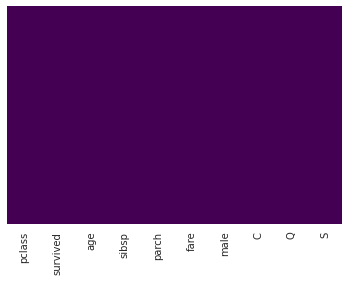

In [19]:
train_df['age'] = train_df[['age','pclass']].apply(impute_age,axis=1)
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
# Generate features matrix X and output matrix Y
X = train_df[['pclass', 'age', 'sibsp', 'parch', 'fare', 'male', 'C', 'Q', 'S']]
y = train_df['survived']

from sklearn.model_selection import train_test_split

In [21]:
#split 30%-70% test-train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
#create Linear Regression object
lm = LogisticRegression(max_iter=10000)

In [24]:
#fit training data
lm.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [25]:
predictions = lm.predict(X_test)

In [26]:
## evaluate model with confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
c_m = confusion_matrix(y_test, predictions)

In [29]:
print(c_m)

[[201  35]
 [ 52 105]]


In [30]:
c_m = np.array(c_m)

In [31]:
## output confusion matrix
print(c_m)

[[201  35]
 [ 52 105]]


In [32]:
trueval = c_m[0][0] + c_m[1][1]
total = np.sum(c_m)
accuracy = (trueval/total)*100
print(' Accuracy of model is {one} %'.format(one = accuracy))

 Accuracy of model is 77.86259541984732 %


In [33]:
from sklearn.metrics import roc_curve

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)

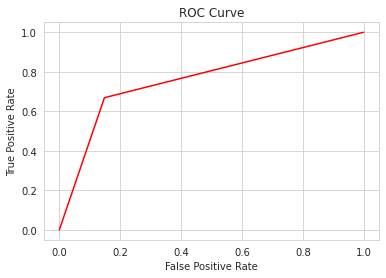

In [35]:
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(fpr, tpr, 'r')
axes.set_xlabel('False Positive Rate')
axes.set_ylabel('True Positive Rate')
axes.set_title('ROC Curve');

auc = np.trapz(tpr,fpr)

In [36]:
print('The AUC(area under curve) is {}'.format(auc))

The AUC(area under curve) is 0.7602423620857174
